# NFL QB Clustering

This project will look at 10 years of data for quarterbacks who have played in the NFL and started a minimum of 15 games during this timeframe. I chose 15 because it is essentially an entire season of games (16 per season) and I wanted to include Justin Herbert, who started 15 games during his rookie season in 2020. The accumulated data includes both passing and rushing stats for quarterbacks to reflect both types of quarterbacks (more traditional pocket passers and more mobile passers that benefit from their legs).

The goal of this project is to use a classification algorithm to predict clusters, or tiers, of quarterbacks based on their statistics over this 10-year window. I was interested in doing this project because I am a huge Dak Prescott fan and think he is ascending into elite Quarterback status. There has been tremendous debate in sports circles as to what he should be paid and whether he should be paid like that of a top tier player at his position. I hope to establish a clear grouping of elite tier quarterbacks and see where Dak Prescott falls within these groupings. 

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from format_data import reformat_data
from cleaning import combine_df
%matplotlib inline

In [2]:
# load in 10 years of Qb data
df = pd.read_csv('total_stats_10_years.csv', index_col = 0)
df.head()

,Pos,G,GS,Cmp,Pass_Att,Pass_Yds,Pass_TD,Int,Pass_1D,GWD,...,Total_1D,Total_TOs,Int_Pct,Pass_TD_Pct,Pass_Yds_Att,Pass_Yds_Cmp,TD_to_TO_Ratio,Tot_Yds_Gm,1D/G,TD/G
Aaron Rodgers,QB,143.0,143.0,3247.0,4976.0,38522.0,325.0,57.0,1847.0,20.0,...,2018.0,115.0,1.1455,6.5314,7.74,11.86,2.9826,285.7832,14.11,2.40
Alex Smith,QB,120.0,117.0,2386.0,3679.0,26251.0,148.0,56.0,1278.0,17.0,...,1416.0,99.0,1.5222,4.0228,7.14,11.00,1.6263,236.7083,11.80,1.34
Andrew Luck,QB,86.0,86.0,2000.0,3290.0,23671.0,171.0,83.0,1190.0,20.0,...,1304.0,127.0,2.5228,5.1976,7.19,11.84,1.4567,293.7326,15.16,2.15
Andy Dalton,QB,144.0,142.0,2973.0,4782.0,33764.0,218.0,126.0,1624.0,27.0,...,1751.0,174.0,2.6349,4.5588,7.06,11.36,1.3793,243.7431,12.16,1.67
Baker Mayfield,QB,46.0,45.0,932.0,1506.0,11115.0,75.0,43.0,538.0,7.0,...,579.0,64.0,2.8552,4.9801,7.38,11.93,1.2344,251.1304,12.59,1.72


In [3]:
# view columns in dataframe
df.columns

Index(['Pos', 'G', 'GS', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Int',
       'Pass_1D', 'GWD', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Fmb',
       'AY/A', 'Total_TD', 'Total_Yds', 'Total_1D', 'Total_TOs', 'Int_Pct',
       'Pass_TD_Pct', 'Pass_Yds_Att', 'Pass_Yds_Cmp', 'TD_to_TO_Ratio',
       'Tot_Yds_Gm', '1D/G', 'TD/G'],
      dtype='object')

In [4]:
# view dimensions of df
df.shape

(75, 28)

In [5]:
# define a new dataframe that holds engineered features of significance
features = df[['Int_Pct', 'Pass_TD_Pct', 'TD_to_TO_Ratio', 'Tot_Yds_Gm', 'TD/G', '1D/G', \
               'Pass_Yds_Cmp', 'Pass_Yds_Att']]

The features I utilized are attributes that have been standardized for comparison. I removed categories like games played or total yards, because these would naturally be larger values for more tenured players. All the features chosen are independent of one another and have been standardized to a per play, per game or ratio basis. These standardized forms of these features are what will be used to identify the difference between clusters/groupings of players. 

In [6]:
# preview features dataframe
features.head()

,Int_Pct,Pass_TD_Pct,TD_to_TO_Ratio,Tot_Yds_Gm,TD/G,1D/G,Pass_Yds_Cmp,Pass_Yds_Att
Aaron Rodgers,1.1455,6.5314,2.9826,285.7832,2.40,14.11,11.86,7.74
Alex Smith,1.5222,4.0228,1.6263,236.7083,1.34,11.80,11.00,7.14
Andrew Luck,2.5228,5.1976,1.4567,293.7326,2.15,15.16,11.84,7.19
Andy Dalton,2.6349,4.5588,1.3793,243.7431,1.67,12.16,11.36,7.06
Baker Mayfield,2.8552,4.9801,1.2344,251.1304,1.72,12.59,11.93,7.38


In [7]:
# define scaler
scaler = preprocessing.MinMaxScaler()

# scale all variables to to be between 0 and 1.
features_normal = scaler.fit_transform(features)
#print(pd.DataFrame(features_normal).describe())

# use pca to reduce number of attributes
pca = PCA(n_components = .95, random_state = 33) #95% of the explained variance

# fit features into new dataframe
features_normal = pca.fit_transform(features_normal)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(features_normal.shape) #reduced to 4 attributes

[0.68842973 0.15249893 0.0887122  0.03525885]
[4.29698425 2.02240135 1.54250164 0.9724517 ]
(75, 4)


I first normalized all data values then used Principal Component Analysis to determine the number of features that explained for 95% of the variance found in the data. This resulted in 4 key attributes and these will be used in my Kmeans model. 

In [8]:
#import module
from sklearn.metrics import silhouette_score

#define number of clusters
kmeans = KMeans(n_clusters = 5, n_init = 100, random_state = 33)

#fit features_normal and predict cluster centers/labels
kmeans.fit(features_normal)
label = kmeans.predict(features_normal)

print(f'Silhouette Score(n = 5): {silhouette_score(features_normal, label)}')
#highest silhouette score for k=2 @ .387

Silhouette Score(n = 5): 0.27205231672059926


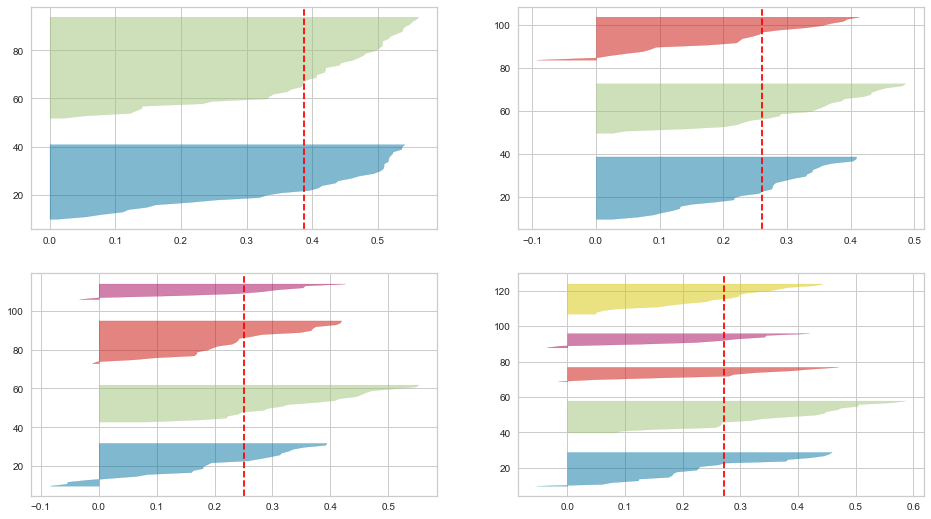

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

# calculate silhoutte score to help choose number of clusters
fig, ax = plt.subplots(2, 2, figsize=(16,9))
for i in [2, 3, 4, 5]:
    
    # Create KMeans instance for different number of clusters    
    km = KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=33)
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_normal)

I tried two different approaches in determining the number of clusters to use in my model. The silhouette score is a metric that shows how well a datapoint fits within its own cluster versus the nearest cluster. The highest silhouette score was found with 2 clusters (.387), but I did not want to simply have a good and a bad quarterback group, so I chose the second highest silhouette score at k=5 (.272) so 5 different groupings of quarterbacks. The visual reflects this by showing all 5 categories above the average score, and all relatively equal in size. Next, I tried the 'elbow method' for determining the number of clusters.

In [10]:
# calculate number of clusters based on inertia score from kmeans
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=33).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

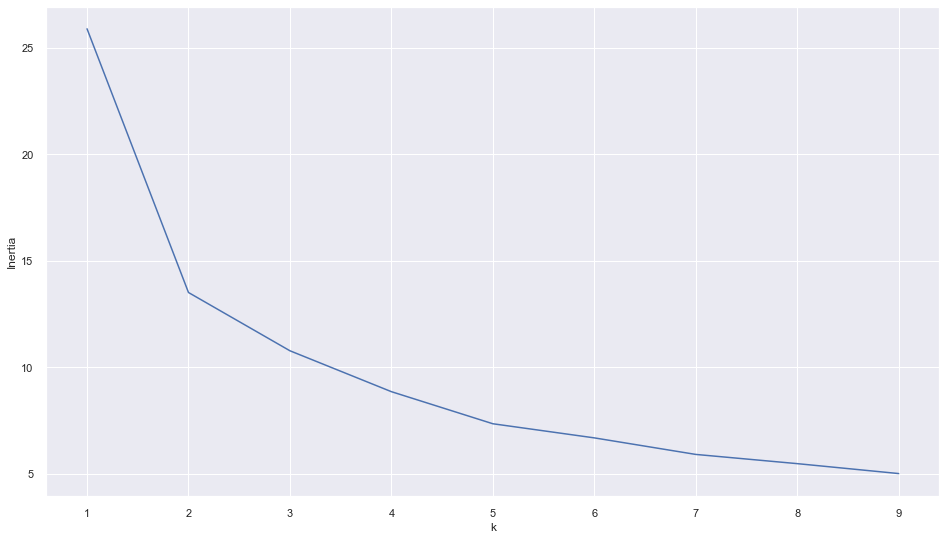

In [11]:
#redefine chart sizing
sns.set(rc={'figure.figsize':(16,9)})

# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()
#k is 5

The ‘elbow method’ shows the changes in inertia (within-cluster sum-of-squares values) depending on the number of clusters, k. When k reaches a value of 5, the change in inertia levels become insignificant and that is a good indication that 5 would be a good choice for the number of clusters. 

In [12]:
# The labels indicate which cluster they belong to
labels = pd.DataFrame(kmeans.labels_) 
df.reset_index(inplace=True) #reset index in order to concat two dfs

# Add labels as new column to existing dataframe
df_labels = pd.concat((df,labels),axis=1) #concat labels column
df_labels = df_labels.rename({0:'Cluster'},axis=1) #rename column 
df_labels.set_index('index', inplace=True) #redefine index column
df.set_index('index', inplace=True)#redefine index column
df_labels.head()

,Pos,G,GS,Cmp,Pass_Att,Pass_Yds,Pass_TD,Int,Pass_1D,GWD,...,Total_TOs,Int_Pct,Pass_TD_Pct,Pass_Yds_Att,Pass_Yds_Cmp,TD_to_TO_Ratio,Tot_Yds_Gm,1D/G,TD/G,Cluster
index,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,QB,143.0,143.0,3247.0,4976.0,38522.0,325.0,57.0,1847.0,20.0,...,115.0,1.1455,6.5314,7.74,11.86,2.9826,285.7832,14.11,2.40,3
Alex Smith,QB,120.0,117.0,2386.0,3679.0,26251.0,148.0,56.0,1278.0,17.0,...,99.0,1.5222,4.0228,7.14,11.00,1.6263,236.7083,11.80,1.34,0
Andrew Luck,QB,86.0,86.0,2000.0,3290.0,23671.0,171.0,83.0,1190.0,20.0,...,127.0,2.5228,5.1976,7.19,11.84,1.4567,293.7326,15.16,2.15,1
Andy Dalton,QB,144.0,142.0,2973.0,4782.0,33764.0,218.0,126.0,1624.0,27.0,...,174.0,2.6349,4.5588,7.06,11.36,1.3793,243.7431,12.16,1.67,0
Baker Mayfield,QB,46.0,45.0,932.0,1506.0,11115.0,75.0,43.0,538.0,7.0,...,64.0,2.8552,4.9801,7.38,11.93,1.2344,251.1304,12.59,1.72,1


Above I concatenated the predicted labels data frame onto our original data frame. This resulted in a data frame that has a new column indicating the players predicted cluster or tier.

In [13]:
df_labels.loc['Dak Prescott']

Pos                    QB
G                      69
GS                     69
Cmp                  1514
Pass_Att             2293
Pass_Yds            17634
Pass_TD               106
Int                    40
Pass_1D               875
GWD                    15
Rush_Att              259
Rush_Yds             1314
Rush_TD                24
Rush_1D               107
Fmb                    34
AY/A                 7.83
Total_TD              130
Total_Yds           18948
Total_1D              982
Total_TOs              74
Int_Pct            1.7444
Pass_TD_Pct        4.6228
Pass_Yds_Att         7.69
Pass_Yds_Cmp        11.65
TD_to_TO_Ratio     1.7568
Tot_Yds_Gm        274.609
1D/G                14.23
TD/G                 1.88
Cluster                 1
Name: Dak Prescott, dtype: object

Text(1.79, 7.69, 'Dak Prescott')

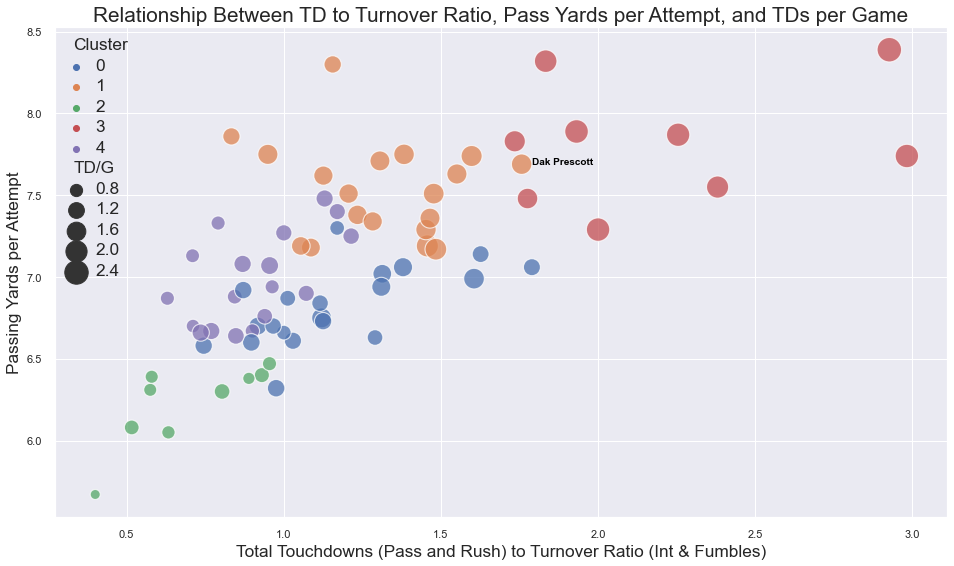

In [14]:
# create bubbleplot
p1 = sns.scatterplot(data = df_labels, x = 'TD_to_TO_Ratio', y = 'Pass_Yds_Att', sizes=(100,600),\
                     size = 'TD/G', hue='Cluster', palette='deep', alpha = .75)

# customize legend
plt.setp(p1.get_legend().get_texts(), fontsize='x-large') # for legend text
plt.setp(p1.get_legend().get_title(), fontsize='x-large') # for legend title

# Plot Title
plt.title('Relationship Between TD to Turnover Ratio, Pass Yards per Attempt, and TDs per Game', fontsize='xx-large')

# Set x-axis label
plt.xlabel('Total Touchdowns (Pass and Rush) to Turnover Ratio (Int & Fumbles)', fontsize='x-large')

# Set y-axis label
plt.ylabel('Passing Yards per Attempt', fontsize='x-large')

#annotate point
plt.annotate("Dak Prescott", (1.79,7.69), fontsize='small', fontweight='semibold', c ='black')

Text(4.63, 1.62, 'Dak Prescott')

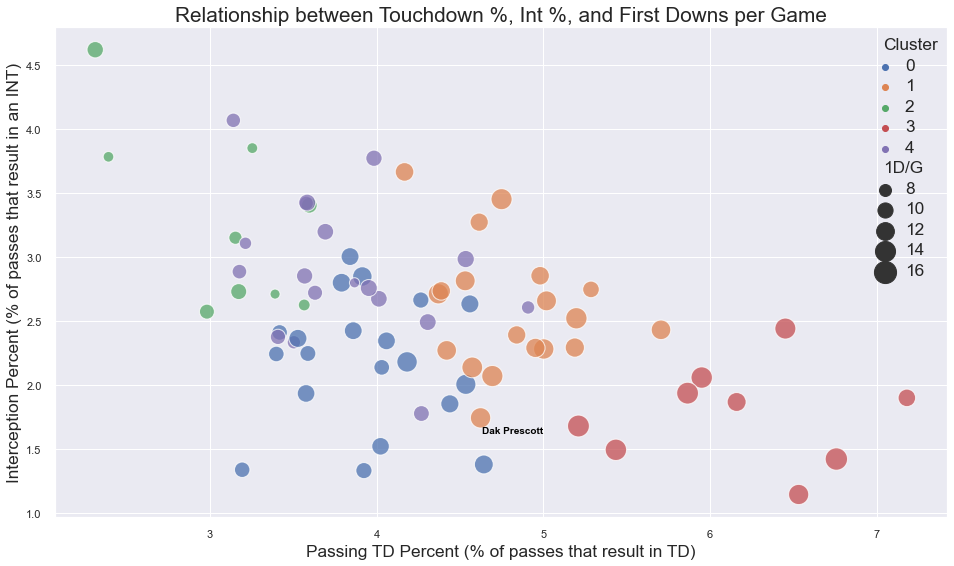

In [15]:
#create bubbleplot
p2 = sns.scatterplot(data = df_labels, x = 'Pass_TD_Pct', y = 'Int_Pct', size = '1D/G', hue='Cluster',\
                     sizes=(100,500), palette='deep', alpha=.75)
plt.setp(p2.get_legend().get_texts(), fontsize='x-large') # for legend text
plt.setp(p2.get_legend().get_title(), fontsize='x-large') # for legend title

# Plot Title
plt.title('Relationship between Touchdown %, Int %, and First Downs per Game', fontsize='xx-large')

# Set x-axis label
plt.xlabel('Passing TD Percent (% of passes that result in TD)', fontsize='x-large')

# Set y-axis label
plt.ylabel('Interception Percent (% of passes that result in an INT)', fontsize='x-large')

#annotate point
plt.annotate("Dak Prescott", (4.63 ,1.62), fontsize='small', fontweight='semibold', c ='black')

Text(7.88, 275, 'Dak Prescott')

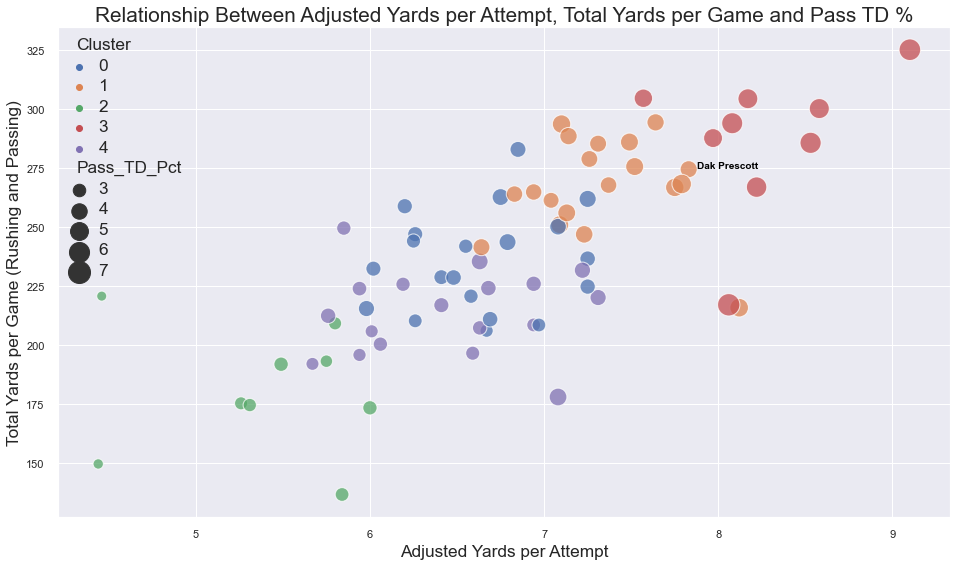

In [16]:
#create bubbleplot
p3 = sns.scatterplot(data = df_labels, x = 'AY/A', y = 'Tot_Yds_Gm', hue = 'Cluster',\
                     size = 'Pass_TD_Pct', sizes=(100,500), palette='deep', alpha=.75)
plt.setp(p3.get_legend().get_texts(), fontsize='x-large') # for legend text
plt.setp(p3.get_legend().get_title(), fontsize='x-large') # for legend title

# Plot Title
plt.title('Relationship Between Adjusted Yards per Attempt, Total Yards per Game and Pass TD %', fontsize='xx-large')

# Set x-axis label
plt.xlabel('Adjusted Yards per Attempt', fontsize='x-large')

# Set y-axis label
plt.ylabel('Total Yards per Game (Rushing and Passing)', fontsize='x-large')

#annotate points
plt.annotate("Dak Prescott", (7.88, 275), fontsize='small', fontweight='semibold', c ='black')

Text(267, 14.45, 'Dak Prescott')

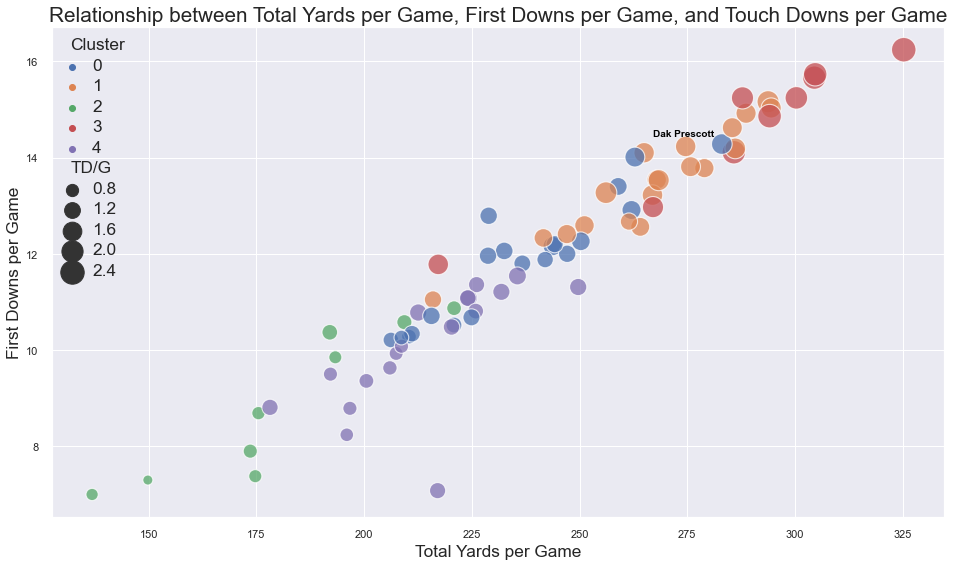

In [17]:
# Create bubbleplot
p5 = sns.scatterplot(data=df_labels, hue='Cluster', x = 'Tot_Yds_Gm', y = '1D/G', \
                     size = 'TD/G', sizes=(100,600), palette='deep', alpha=.75)
plt.setp(p5.get_legend().get_texts(), fontsize='x-large') # for legend text
plt.setp(p5.get_legend().get_title(), fontsize='x-large') # for legend title

# Plot Title
plt.title('Relationship between Total Yards per Game, First Downs per Game, and Touch Downs per Game', \
          fontsize='xx-large')

# Set x-axis label
plt.xlabel('Total Yards per Game', fontsize='x-large')

# Set y-axis label
plt.ylabel('First Downs per Game', fontsize='x-large')

#annotate points
plt.annotate("Dak Prescott", (267, 14.45), fontsize='small', fontweight='semibold', c ='black')

In [18]:
# get all players
players = df_labels.index
# get all cluster labels
clusters = df_labels['Cluster']

# append player name and cluster to a list
average_tier, above_average_tier, terrible_tier, elite_tier, below_average_tier = [], [], [], [], []
for i in range(len(players)):
    if clusters[i] == 0:
        average_tier.append(players[i])
    elif clusters[i] == 1:
        above_average_tier.append(players[i])
    elif clusters[i] == 2:
        terrible_tier.append(players[i])
    elif clusters[i] == 3:
        elite_tier.append(players[i])
    elif clusters[i] == 4:
        below_average_tier.append(players[i])

In [19]:
elite_tier

['Aaron Rodgers',
 'Deshaun Watson',
 'Drew Brees',
 'Justin Herbert',
 'Lamar Jackson',
 'Patrick Mahomes',
 'Peyton Manning',
 'Russell Wilson',
 'Tom Brady']

In [20]:
above_average_tier

['Andrew Luck',
 'Baker Mayfield',
 'Ben Roethlisberger',
 'Cam Newton',
 'Carson Palmer',
 'Dak Prescott',
 'Eli Manning',
 'Jameis Winston',
 'Jared Goff',
 'Jimmy Garoppolo',
 'Josh Allen',
 'Kirk Cousins',
 'Matt Ryan',
 'Matthew Stafford',
 'Nick Mullens',
 'Philip Rivers',
 'Ryan Fitzpatrick',
 'Ryan Tannehill',
 'Tony Romo']

In [21]:
average_tier

['Alex Smith',
 'Andy Dalton',
 'Blake Bortles',
 'Carson Wentz',
 'Case Keenum',
 'Daniel Jones',
 'Derek Carr',
 'Drew Lock',
 'Gardner Minshew II',
 'Jacoby Brissett',
 'Joe Flacco',
 'Kyle Allen',
 'Kyler Murray',
 'Matt Hasselbeck',
 'Mike Glennon',
 'Mitchell Trubisky',
 'Nick Foles',
 'Sam Bradford',
 'Teddy Bridgewater',
 'Tyrod Taylor']

In [22]:
below_average_tier

['Brandon Weeden',
 'Brian Hoyer',
 'Chad Henne',
 'Colin Kaepernick',
 'Geno Smith',
 'Jake Locker',
 'Jay Cutler',
 'Josh Freeman',
 'Josh McCown',
 'Kyle Orton',
 'Marcus Mariota',
 'Mark Sanchez',
 'Matt Moore',
 'Matt Schaub',
 'Michael Vick',
 'Robert Griffin III',
 'Sam Darnold',
 'Trevor Siemian']

In [23]:
terrible_tier

['Blaine Gabbert',
 'Brock Osweiler',
 'Christian Ponder',
 'Colt McCoy',
 'DeShone Kizer',
 'EJ Manuel',
 'Jason Campbell',
 'Josh Rosen',
 'Matt Cassel']

In [24]:
df_labels['x-axis'] = "" 
#This is just to add something constant for the strip/swarm plots' X axis. 
# this will be plotted as the x axis so one attribute can be viewed at a time

In [25]:
df_labels.columns

Index(['Pos', 'G', 'GS', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Int',
       'Pass_1D', 'GWD', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Fmb',
       'AY/A', 'Total_TD', 'Total_Yds', 'Total_1D', 'Total_TOs', 'Int_Pct',
       'Pass_TD_Pct', 'Pass_Yds_Att', 'Pass_Yds_Cmp', 'TD_to_TO_Ratio',
       'Tot_Yds_Gm', '1D/G', 'TD/G', 'Cluster', 'x-axis'],
      dtype='object')

In [26]:
strip_plot = df_labels[[ 'Pass_TD_Pct', 'Int_Pct', 'TD_to_TO_Ratio', 'Tot_Yds_Gm', 'TD/G', '1D/G', \
               'Pass_Yds_Cmp', 'Pass_Yds_Att', 'AY/A', 'Cluster', 'x-axis']]

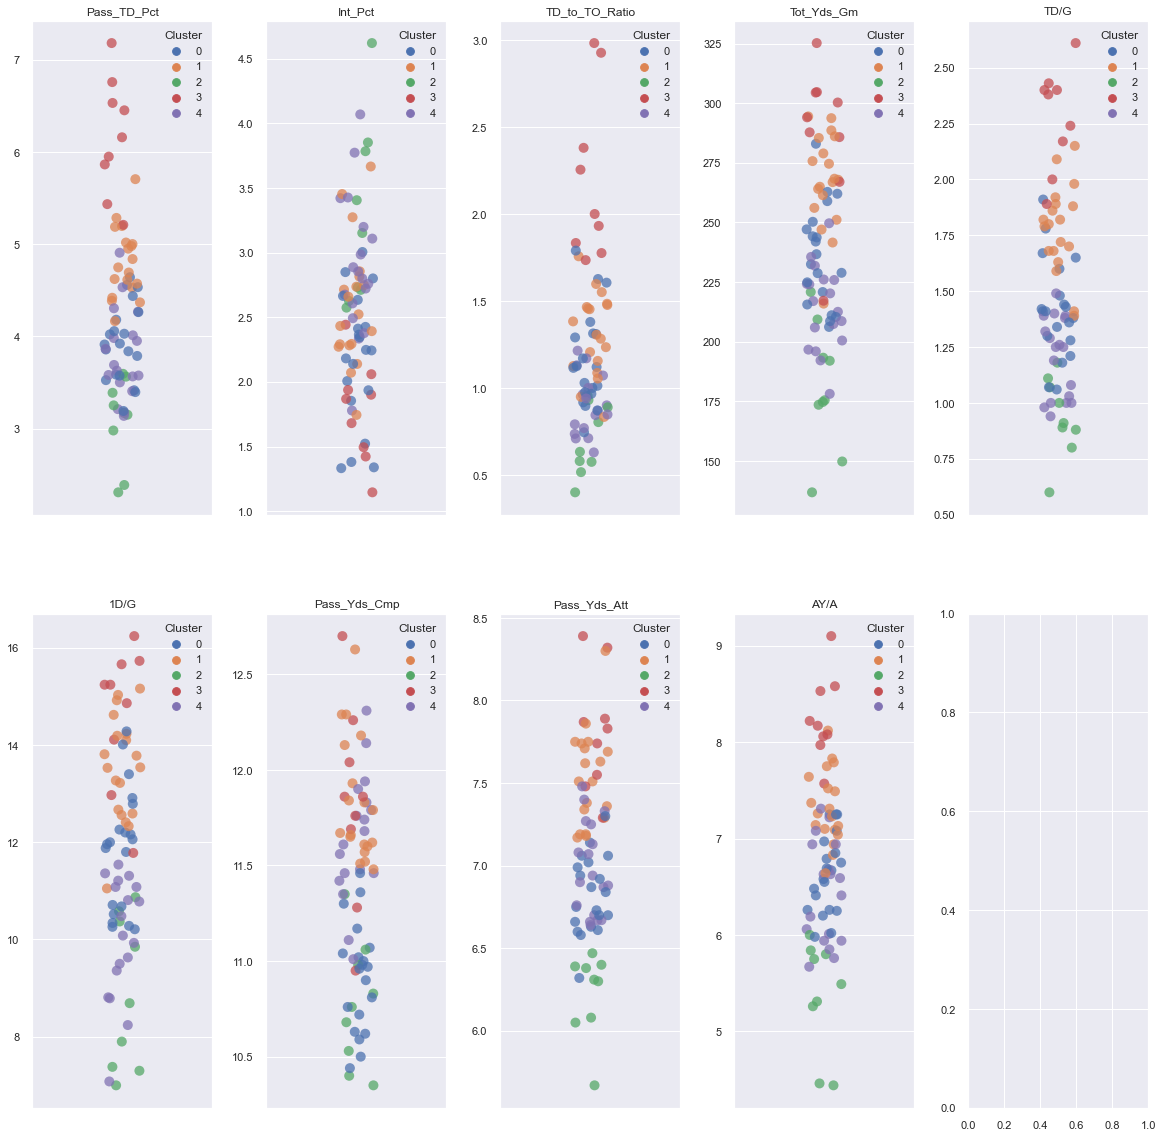

In [27]:
# show cluster distribution per column
f, axes = plt.subplots(2, 5, figsize=(20, 20)) 
f.subplots_adjust(hspace=0.2, wspace=.3)
for i in range(0,len(list(strip_plot))-2):
    col = strip_plot.columns[i]
    if i < 5:
        ax = sns.stripplot(x = df_labels['x-axis'], y = strip_plot[col].values,
                           hue = strip_plot['Cluster'],ax = axes[0,(i)],
                          size=10, palette='deep', alpha = .75)
        ax.set_title(col)
        ax.set_xlabel('') # remove x axis label
    elif i >= 5 and i < 10:
        ax = sns.stripplot(x = df_labels['x-axis'], y = strip_plot[col].values,
                           hue = strip_plot['Cluster'],ax = axes[1,(i-5)],
                          size=10, palette='deep', alpha = .75)
        ax.set_title(col)
        ax.set_xlabel('') # remove x axis label
   

The above strip plots show how the clusters are spread out across varying categories. The distinction between categories becomes more apparent.

In [28]:
# load 2019/2020 data into dataframes
df2019 = pd.read_csv('2019_total_stats.csv', index_col = 0)
df2020 = pd.read_csv('2020_total_stats.csv', index_col = 0)
#print(df2020.head())

# combine two dataframes, skipping Position column
data = combine_df(df2019.iloc[:, 1:], \
                        df2020.iloc[:, 1:])

#add back the position column
data.insert(0,'Pos', 'QB')

# add calculated fields into the dataframe (engineered features)
data = reformat_data(-1, data)

# retrieve just Dak Prescott's last two years of stats
dak_data = data.loc['Dak Prescott']
print(dak_data)

Pos                    QB
G                      21
GS                     21
Cmp                   539
Pass_Att              818
Pass_Yds             6758
Pass_TD                39
Int                    15
Pass_1D               322
GWD                     1
Rush_Att               70
Rush_Yds              370
Rush_TD                 6
Rush_1D                27
Fmb                     9
AY/A                 8.39
Total_TD               45
Total_Yds            7128
Total_1D              349
Total_TOs              24
Int_Pct            1.8337
Pass_TD_Pct        4.7677
Pass_Yds_Att         8.26
Pass_Yds_Cmp        12.54
TD_to_TO_Ratio      1.875
Tot_Yds_Gm        339.429
1D/G                16.62
TD/G                 2.14
Name: Dak Prescott, dtype: object


Above I extracted Dak Prescott’s 2019 and 2020 stats, which ends up being only 21 games he was able to play due to injury. Next, I will again normalize these stats against the 10 years’ worth of data previously collected, and then follow the same process as before to predict which tier Dak Prescott would fall in when just using his past two seasons worth of data. 


In [29]:
dak_features = dak_data[['Int_Pct', 'Pass_TD_Pct', 'TD_to_TO_Ratio', 'Tot_Yds_Gm', 'TD/G', '1D/G', \
               'Pass_Yds_Cmp', 'Pass_Yds_Att']]
dak_features.rename('Dak Prescott 19-20', inplace=True)
#print(dak_features)

features = features.append(dak_features)
print(features.tail(1)) # see last row added to df

#print(features.loc['Dak Prescott'])

# scale all variables to to be between 0 and 1.
features_normal = scaler.fit_transform(features)
#print(pd.DataFrame(features_normal).describe())

# use pca to reduce number of attributes
pca = PCA(n_components = .95, random_state = 33) #95% of the explained variance

# fit features into new dataframe
features_normal = pca.fit_transform(features_normal)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
print(features_normal.shape) #reduced to 4 attributes, 76th row added *Daks 2019/2020 stats

                    Int_Pct  Pass_TD_Pct  TD_to_TO_Ratio  Tot_Yds_Gm  TD/G  \
Dak Prescott 19-20   1.8337       4.7677           1.875    339.4286  2.14   

                     1D/G  Pass_Yds_Cmp  Pass_Yds_Att  
Dak Prescott 19-20  16.62         12.54          8.26  
(76, 4)


In [30]:
dak_features_normal = features_normal[-1] #last row we added to df

In [31]:
dak_tier = kmeans.predict([dak_features_normal]) # predict cluster

In [32]:
dak_tier #elite tier when using 2019/2020 stats

array([3])

Cluster # 3 was defined above as the elite tier, that includes the likes of Aaron Rodgers, Tom Brady, Patrick Mahomes, and Deshaun Watson. Based just on Dak’s performance the past two years, it appears he has elevated himself into the upper echelon of elite quarterbacks. His overall career stats already indicated he was very near the top tier, at the higher end of the above average group. These past two years indicate he has elevated his play to an elite level. Considering he is just 27 years old, and in his physical prime, all indications point to him being worthy of a lucrative contract and he is the very definition of a franchise quarterback. If Jerry Jones is listening, please pay that man! 

In [33]:
# transpose data and convert to a dataframe
dak_data = dak_data.to_frame().T

In [34]:
# add a new column to indicate which cluster Dak belongs to
dak_data['Cluster'] = dak_tier[0]
dak_data

,Pos,G,GS,Cmp,Pass_Att,Pass_Yds,Pass_TD,Int,Pass_1D,GWD,...,Total_TOs,Int_Pct,Pass_TD_Pct,Pass_Yds_Att,Pass_Yds_Cmp,TD_to_TO_Ratio,Tot_Yds_Gm,1D/G,TD/G,Cluster
Dak Prescott,QB,21,21,539,818,6758,39,15,322,1,...,24,1.8337,4.7677,8.26,12.54,1.875,339.429,16.62,2.14,3


In [35]:
# export to csv 
dak_data.to_csv('dak_data_2019_2020.csv')

In [36]:
# drop unncessary column
df_labels.drop(columns = 'x-axis', inplace = True) 

# export qb stats with cluster labels included
df_labels.to_csv('qb_stats_wlabels.csv')